# Repaso Módulo 1 y Módulo 2 

En esta Notebook vamos a hacer un repaso de lo visto en la primera parte del curso. Vamos a realizar cada paso de un Proyecto de Ciencia de Datos:

1. Definición del Problema
2. Búsqueda de datos 
3. Exploración y Limpieza de Datos
4. Dividisión de los datos en **X** (variables predictoras) e **y** (variable a predecir). División de los datos en entrenamiento y testo con el méodo *train_test_split*
5. Entrenamiento del modelo
6. Testeo del Modelo 

### Definición del problema

**¿Cuál será la edad de una zarigüeya en base a determinadas características?**

### Búsqueda de datos

El dataset que se utilizará es sobre zarigüeyas, consta de nueve medidas morfométricas en 104 zarigüeyas, atrapadas en siete sitios desde el sur de Victoria hasta el centro de Queensland (Australia). En base a estas características es posible predecir la edad.
Esta basado en el dataset descargable en [Kaggle](https://www.kaggle.com/abrambeyer/openintro-possum) pero tiene realizadas algunas modificaciones por lo que debe ser tomado desde el archivo csv descargado desde la plataforma. 

### Regresión

Dado que la variable a predecir es numérica, el modelo de aprendizaje supervisado que entrenaremos será un modelo de **Regresión**, en este caso realizaremos una **Regresión Lineal Multiple** como hicimos en el Módulo 2.

In [119]:
# Iportamos las librerías que utilizaremos
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns


In [120]:
# Definiremos data con el dataset con el método pd.read_csv

data = pd.read_csv("dataset_zarigueya.csv")

## Exploración del dataset

Realizaremos la primer exploración del dataset utilizando distintos métodos de la librería Pandas:
- Los primero registros del Dataset
- El tamaño del dataset
- Los tipos de datos de las columnas
- Las características de las variable numéricas
- La correlación de las variables numéricas

In [121]:
data.head(3)

,id,sitio,populacion,sexo,cabeza,craneo,largo_total,cola,pie,oreja,ojo,torax,vientre,edad
0,1,sitio 1,Vic,m,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,8.0
1,2,sitio 1,Vic,f,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,6.0
2,3,sitio 1,Vic,f,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,6.0


In [122]:
data.shape

(102, 14)

In [123]:
data.dtypes

id               int64
sitio           object
populacion      object
sexo            object
cabeza         float64
craneo         float64
largo_total    float64
cola           float64
pie            float64
oreja          float64
ojo            float64
torax          float64
vientre        float64
edad           float64
dtype: object

In [124]:
data.describe()

,id,cabeza,craneo,largo_total,cola,pie,oreja,ojo,torax,vientre,edad
count,102.000000,97.000000,97.000000,97.000000,97.000000,96.000000,97.000000,102.000000,102.000000,102.000000,102.000000
mean,52.647059,92.712371,56.937113,87.259794,37.072165,68.382292,48.113402,15.058824,27.063725,32.617647,3.833333
std,30.444446,3.600933,3.152622,4.295823,1.976410,4.427617,4.117838,1.056742,2.010703,2.722456,1.909244
min,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000,1.000000
25%,26.250000,90.700000,55.000000,84.000000,36.000000,64.475000,44.900000,14.400000,25.500000,31.000000,2.250000
50%,53.500000,92.800000,56.400000,88.000000,37.000000,67.950000,46.800000,14.950000,27.000000,32.500000,3.000000
75%,78.750000,94.800000,58.100000,90.500000,38.000000,72.425000,52.000000,15.775000,28.000000,34.000000,5.000000
max,104.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000,9.000000


In [125]:
data.corr()

,id,cabeza,craneo,largo_total,cola,pie,oreja,ojo,torax,vientre,edad
id,1.000000,-0.224246,-0.139488,-0.365155,0.290807,-0.782654,-0.768261,-0.087489,-0.421856,-0.220847,-0.194525
cabeza,-0.224246,1.000000,0.707777,0.679504,0.284041,0.427965,0.150070,0.355644,0.619791,0.556589,0.316356
craneo,-0.139488,0.707777,1.000000,0.505242,0.251253,0.299276,0.023833,0.312093,0.632519,0.449156,0.281542
largo_total,-0.365155,0.679504,0.505242,1.000000,0.572505,0.490196,0.195592,0.246011,0.564731,0.508036,0.263548
cola,0.290807,0.284041,0.251253,0.572505,1.000000,-0.085018,-0.360225,0.194197,0.155907,0.311251,0.150201
pie,-0.782654,0.427965,0.299276,0.490196,-0.085018,1.000000,0.776407,0.030272,0.510143,0.306312,0.100794
oreja,-0.768261,0.150070,0.023833,0.195592,-0.360225,0.776407,1.000000,-0.143152,0.247523,0.071174,0.023880
ojo,-0.087489,0.355644,0.312093,0.246011,0.194197,0.030272,-0.143152,1.000000,0.134050,0.235207,0.235553
torax,-0.421856,0.619791,0.632519,0.564731,0.155907,0.510143,0.247523,0.134050,1.000000,0.608153,0.334209
vientre,-0.220847,0.556589,0.449156,0.508036,0.311251,0.306312,0.071174,0.235207,0.608153,1.000000,0.354298


#### Variable a predecir

La variable a Predecir es *edad* por lo que realizaremos una pequeña exploración de esta variable con librería Pandas y realizando algunas visualizaciones con las librerías Matplotplib y Seaborn.

- Mínimo valor de la columna
- Máximo valor de la columna
- Promedio de los valores de la columna (mean)
- Gráfico displot

In [126]:
data["edad"].min()

1.0

In [127]:
data["edad"].max()

9.0

In [128]:
data["edad"].mean()

3.8333333333333335

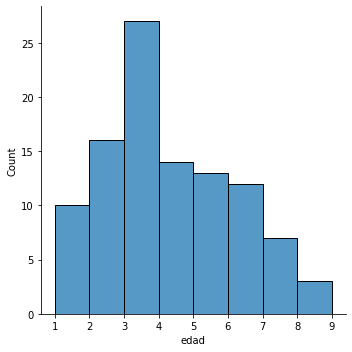

In [129]:
sns.displot(data["edad"])

### Limpieza de datos

Realizaremos la limpieza de los datos con distintos métodos de la librería Pandas:
- ELiminaremos columnas inecesarias para el entrenamiento del modelo
- Realizaremos la limpieza de los datos nulos con algunas de las posibles estrategias: marcar, eliminar o imputar
- Realizaremos la identificación y modificación de las variables categóricas

##### Eliminar columnas

In [130]:
data.drop(columns=["id", "populacion", 'sitio'], inplace=True)

##### Limpieza de datos - nulos

In [131]:
data.isnull().sum()

sexo           5
cabeza         5
craneo         5
largo_total    5
cola           5
pie            6
oreja          5
ojo            0
torax          0
vientre        0
edad           0
dtype: int64

In [132]:
nulo_cabeza = data["cabeza"].isnull()
data.loc[nulo_cabeza]

,sexo,cabeza,craneo,largo_total,cola,pie,oreja,ojo,torax,vientre,edad
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4,28.0,32.0,4.0
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.9,25.5,36.0,7.0
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.5,27.5,29.5,4.0
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,25.5,31.5,2.0
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,28.0,35.0,3.0


In [133]:
# Qué datos toma la variable

data.dropna(axis=0, thresh=7, inplace=True)

In [134]:
# Comprobamos el tamaño del dataset y la cantidad de nulos

print(data.shape)
data.isnull().sum()

(97, 11)


sexo           0
cabeza         0
craneo         0
largo_total    0
cola           0
pie            1
oreja          0
ojo            0
torax          0
vientre        0
edad           0
dtype: int64

In [135]:
nulo_pie = data["pie"].isnull()
data.loc[nulo_pie]

,sexo,cabeza,craneo,largo_total,cola,pie,oreja,ojo,torax,vientre,edad
40,f,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5,5.0


In [136]:
promedio = data["pie"].mean()
promedio

68.38229166666667

In [137]:
data.loc[nulo_pie, "pie"] = round(promedio,2)

In [138]:
# Comprobamos que este correctamente imputado y que no haya más datos nulos en lluvia

data.isnull().sum()

sexo           0
cabeza         0
craneo         0
largo_total    0
cola           0
pie            0
oreja          0
ojo            0
torax          0
vientre        0
edad           0
dtype: int64

### Variables categóricas y numéricas

In [139]:
data.dtypes

sexo            object
cabeza         float64
craneo         float64
largo_total    float64
cola           float64
pie            float64
oreja          float64
ojo            float64
torax          float64
vientre        float64
edad           float64
dtype: object

In [140]:
data = pd.get_dummies(data,  drop_first=True)
data

,cabeza,craneo,largo_total,cola,pie,oreja,ojo,torax,vientre,edad,sexo_m
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,8.0,1
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,6.0,0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,6.0,0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,6.0,0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
97,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1.0,1
98,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1.0,1
99,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,6.0,0
100,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,4.0,1


In [141]:
data.columns

Index(['cabeza', 'craneo', 'largo_total', 'cola', 'pie', 'oreja', 'ojo',
       'torax', 'vientre', 'edad', 'sexo_m'],
      dtype='object')

### Regresión Lineal Multiple
 
Ahora que ya hemos realizado la exploración y limpieza del Dataset, vamos a entrenar unaRegresión Lineal Multiple como vimos en la primera parte del año, para poder generar un modelo que sirva para predecir la *edad* de las zarigüeyas.

Realizaremos los siguientes pasos:

1. Dividir los datos en **X** (variables predictoras) e **y** (variable a predecir)
2. Dividir los datos en entrenamiento y testo con el méodo *train_test_split*
3. Importar e instanciar el modelo que utilizaremos y definir hiperparámetros
4. Entrenar el modelo con el método *fit*
5. Testear el modelo con el método *predict*
6. Ver la performance con una métrica 

In [142]:
# Definimos X e y siendo X las variables predictoras e y la variable a predecir
target = 'pie'
X=data.drop(columns=target)
y=data[target]

In [143]:
# Importamos train_test_split de la libreria scikit-learn

from sklearn.model_selection import train_test_split 

In [144]:
# Definimos X de entrenamiento y de testeo e y de entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [145]:
# Revisamos que esté correctamente realizada la operación

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72, 10)
(72,)
(25, 10)
(25,)


##### Entrenamiento del modelo

Primero vamos a instanciar el modelo definiendo los hiperárametros por default y entrenaremos el modelo con el método *fit*

In [146]:
# Importamos el modelo que utilizaremos. Regresión lineal

from sklearn.linear_model import LinearRegression

In [147]:
# Definimos un objeto con el modelo importado, en este caso los hiperparametros son por default por lo que el parentesis está vacio

modelo = LinearRegression()


In [148]:
# Realizamos el entrenamiento del modelo con el método fit y los datos de entrenamiento 

modelo.fit(X_train, y_train)

LinearRegression()

In [149]:
# Observamos los parámetros del modelo entrenado
# Coeficiente (la pendiente de la recta)

modelo.coef_

array([-0.02774087,  0.03188888,  0.33075773, -0.16339079,  0.69408147,
        0.06359789,  0.50474123, -0.05126563,  0.00279198, -0.32724379])

In [150]:
# Intercepto (el punto de comienzo de la recta en el eje y)

modelo.intercept_

0.006761128691351814

##### Testeo del modelo

Utilizaramos el método *predict* para probar nuestro modelo con los datos de Testeo reservados previamente. Realizaremos la comparación del resultado de la predición de nuestro modelo con los datos conocidos.
Utilizaremos la métrica **r2**

In [151]:
# Probamos nuestro modelo con predict y los datos de test

y_pred = modelo.predict(X_test)
print (y_pred)
print (y_test)

[74.08870683 71.19658232 67.58272174 61.5363822  65.16327113 68.9829426
 70.61254814 65.86136574 74.67108292 71.55011295 65.72014482 73.59877403
 62.35155665 65.7048827  67.97150874 66.03460722 60.15418722 72.95396351
 67.76726436 72.60266326 73.10969849 63.14173144 63.6274074  70.3264856
 67.20548948]
16     73.2
23     75.0
84     71.7
69     62.0
67     65.4
52     72.5
43     71.5
99     63.5
17     73.7
19     73.8
89     67.6
8      72.4
90     63.8
44     66.0
26     70.3
91     64.2
76     62.8
30     68.0
101    67.6
11     71.7
34     71.2
78     65.6
97     66.0
36     71.2
37     68.4
Name: pie, dtype: float64


In [152]:
# Importamos una métrica para medir la performance modelo de regresión lineal: R2

from sklearn.metrics import r2_score


In [153]:
# Utilizamos R2 para medir la performance del modelo

r2 = r2_score(y_test, y_pred)
r2

0.6664801728654312

##### Entrenamiento del modelo cambiando el hiperparámetro

Vamos a entrenar un segundo modelo de Regresión Lineal Multiple pero en este caso modificaremos el hiperparámetro *fit_intercept* para comparar los resultados con el modelo entrenado previamente.

In [154]:
# Definimos un objeto con el modelo importado, en este caso los hiperparametros son por default por lo que el parentesis está vacio

modelo_sin_inter = LinearRegression(fit_intercept=False)


In [155]:
# Realizamos el entrenamiento del modelo con el método fit y los datos de entrenamiento 

modelo_sin_inter.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [156]:
# Observamos los parámetros del modelo entrenado
# Coeficiente (la pendiente de la recta)

modelo_sin_inter.coef_

array([-0.02770187,  0.0319087 ,  0.33072506, -0.16331172,  0.69411551,
        0.06366315,  0.50473495, -0.05127491,  0.00275159, -0.32734988])

In [157]:
# Intercepto (el punto de comienzo de la recta en el eje y)

modelo_sin_inter.intercept_

0.0

##### Testeo del modelo

Utilizaramos el método *predict* para probar nuestro modelo con los datos de Testeo reservados previamente. Realizaremos la comparación del resultado de la predición de nuestro modelo con los datos conocidos.
Utilizaremos la métrica **r2** para poder comparar el resultado con el modelo entrenado anteriormente (sin intercepto)

In [158]:
# Probamos nuestro modelo con predict y los datos de test

y_pred_sin_inter = modelo_sin_inter.predict(X_test)

In [159]:
# Utilizamos R2 para medir la performance del modelo

r2_sin_inter = r2_score(y_test, y_pred_sin_inter)
r2_sin_inter

0.6665012107590669

In [160]:
print("El R2 del modelo con hiperparametros por default: ", round(r2,2))
print("El R2 del modelo con hiperparametros fit_intercept=False: ", round(r2_sin_inter,2))

El R2 del modelo con hiperparametros por default:  0.67
El R2 del modelo con hiperparametros fit_intercept=False:  0.67




##### ¿Qué podríamos hacer para mejorar estos resultados?